<a href="https://colab.research.google.com/github/ShreyaWangi/2KE22CS142/blob/main/NavieBayes(lab_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes with Olivetti Faces Dataset
In this notebook, we will use the Olivetti Faces dataset to classify images using a Naive Bayes classifier.

## About Dataset

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <br>

The files are in PGM format, and can conveniently be viewed on UNIX (TM) systems using the 'xv' program. The size of each image is 92x112 pixels, with 256 grey levels per pixel. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). <br>

The database can be retrieved from http://www.cl.cam.ac.uk/Research/DTG/attarchive:pub/data/att_faces.zip as a ZIP file of similar size.

## Note:
If you're not using libraries like OpenCV, Pillow, or TensorFlow to handle image formats directly, converting your data to CSV or NPY format is a practical approach. <br>
**CSV** Not ideal for large datasets since they lack efficient storage or computational speed. <br>
**npy** Not human-readable, but highly suitable for direct use in Python-based ML frameworks.

## Task Carried
1. Upload my own image and label the class

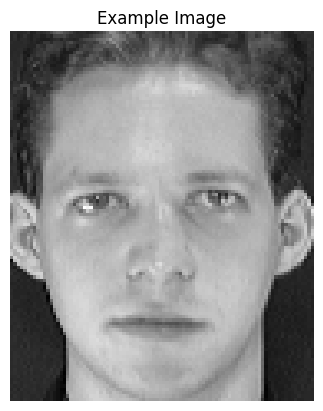

In [ ]:
# Load the dataset downloaded and convery it to npy fileformat

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = 'E:/Department/UG2024_25/ML/MLLab/OlivettiDataset'

# Read one image from this dataset and show the image
img_path = os.path.join(dataset_path, 's1', '1.pgm')  # Example image path. Note that s1 is the class and 1.pgm is
                                                      # one instancein that label. There are 10 instances in each class and
                                                      # 40 classes in total.


img = Image.open(img_path).convert('L')  # Convert to grayscale
# img.show()  # Display the image in a saperate application window, let not do this

# Lets show the image in notebook itself using imshow
plt.imshow(np.array(img), cmap='gray')
plt.axis('off')  # Hide axes
plt.title('Example Image')
plt.show()

Images shape: (400, 112, 92)
Labels shape: (400,)
First image shape: (112, 92)
First label: 1


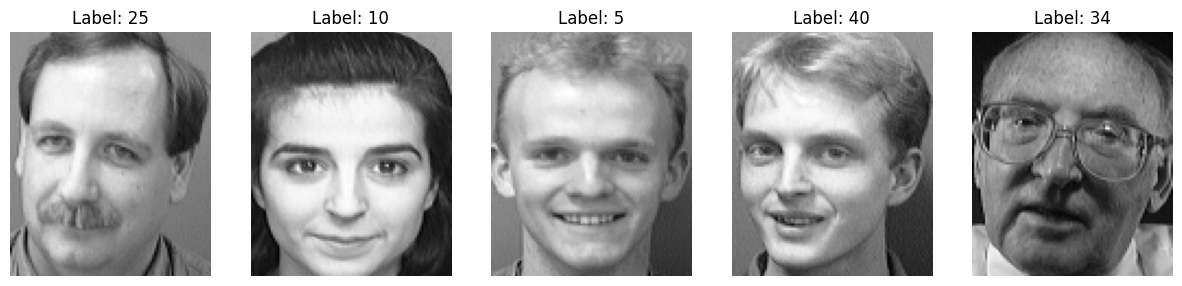

In [ ]:
# Convert to .npy format
# Load all images into a numpy array
images = []
labels = []
for label in range(1, 41):  # 40 classes
    for instance in range(1, 11):  # 10 instances per class
        img_path = os.path.join(dataset_path, f's{label}', f'{instance}.pgm')
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        images.append(np.array(img))
        labels.append(label)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Save to .npy files
np.save('olivetti_images.npy', images)
np.save('olivetti_labels.npy', labels)
# Check the shape of the loaded data
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
# Check the first image and its label
print(f"First image shape: {images[0].shape}")
print(f"First label: {labels[0]}")

# Shuffle the dataset
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# show the five images in notebook itself using imshow
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')
plt.show()



In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
#Initialize and train the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
# Reshape the images to 2D arrays
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
nb_classifier.fit(X_train_reshaped, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_reshaped)

**IMPORTANT NOTE**
If you're using Python's scikit-learn library, the GaussianNB class is designed to handle continuous attributes. You don't need to explicitly specify which attributes are continuous—it assumes all features are continuous and models them using a Gaussian distribution.


In [ ]:
#Evaluate the model
from sklearn.metrics import accuracy_score

print("=" * 50)
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f} %")
print("=" * 50)

Model Evaluation:
Accuracy: 86.25 %


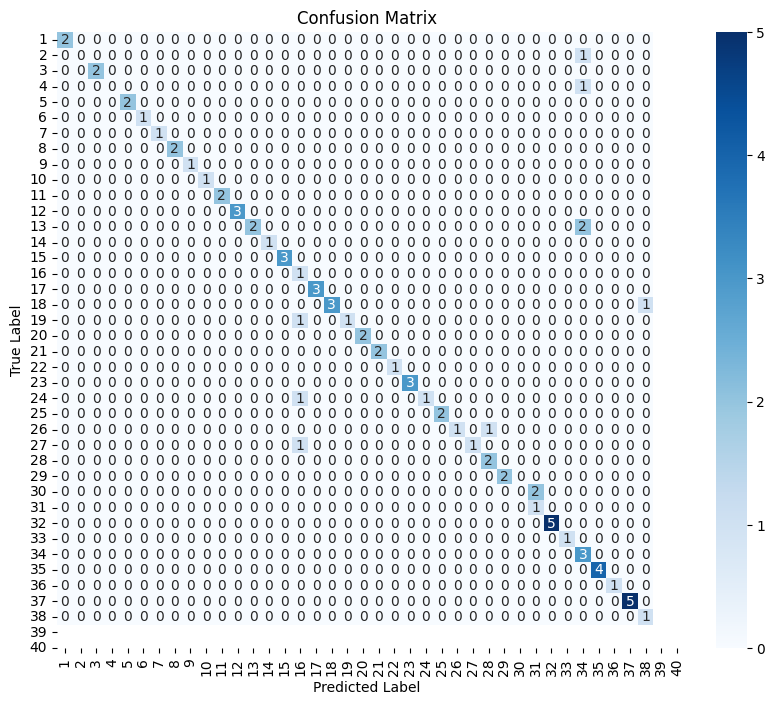

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, 41), yticklabels=np.arange(1, 41))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


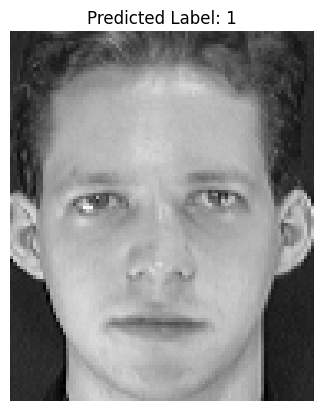

In [ ]:
# Upload a test image and predict its label

test_img_path = 'E:/Department/UG2024_25/ML/MLLab/OlivettiDataset/s1/1.pgm'  # Example test image path
test_img = Image.open(test_img_path).convert('L')  # Convert to grayscale
test_img_array = np.array(test_img)
test_img_reshaped = test_img_array.reshape(1, -1)  # Reshape to 2D array for prediction


predicted_label = nb_classifier.predict(test_img_reshaped)

# Show the test image
plt.imshow(test_img_array, cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label[0]}')
plt.show()


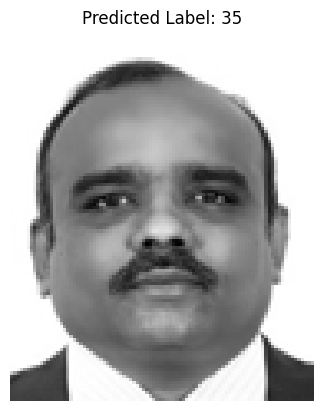

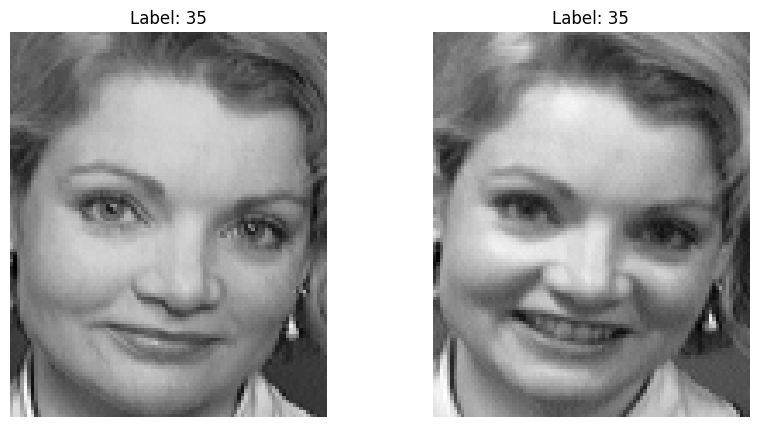

In [ ]:
# Lets evaluate for my own photo
# load photograph of me

my_img_path = 'E:/Department/UG2024_25/ML/MLLab/95100.jpg'
#Convert to grayscale
my_img = Image.open(my_img_path).convert('L')
# Resize to match the dataset image size ()
my_img = my_img.resize((92, 112))  # Resize to 64x64 pixels
# Convert to numpy array
my_img_array = np.array(my_img)

# Reshape the image to 2D array for prediction
my_img_reshaped = my_img_array.reshape(1, -1)  # Reshape to 2D array for prediction

# Predict the label
predicted_label = nb_classifier.predict(my_img_reshaped)
# Show the test image
plt.imshow(my_img_array, cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label[0]}')
plt.show()

# Display two images from the dataset with predicted label
# Get the indices of images with predicted label
indices = np.where(labels == predicted_label)[0]
# Select two random indices from the list of indices
random_indices = np.random.choice(indices, size=2, replace=False)
# Display the two images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {labels[idx]}')
plt.show()



## Activity to do
1. Repeat the process for your own image

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.8

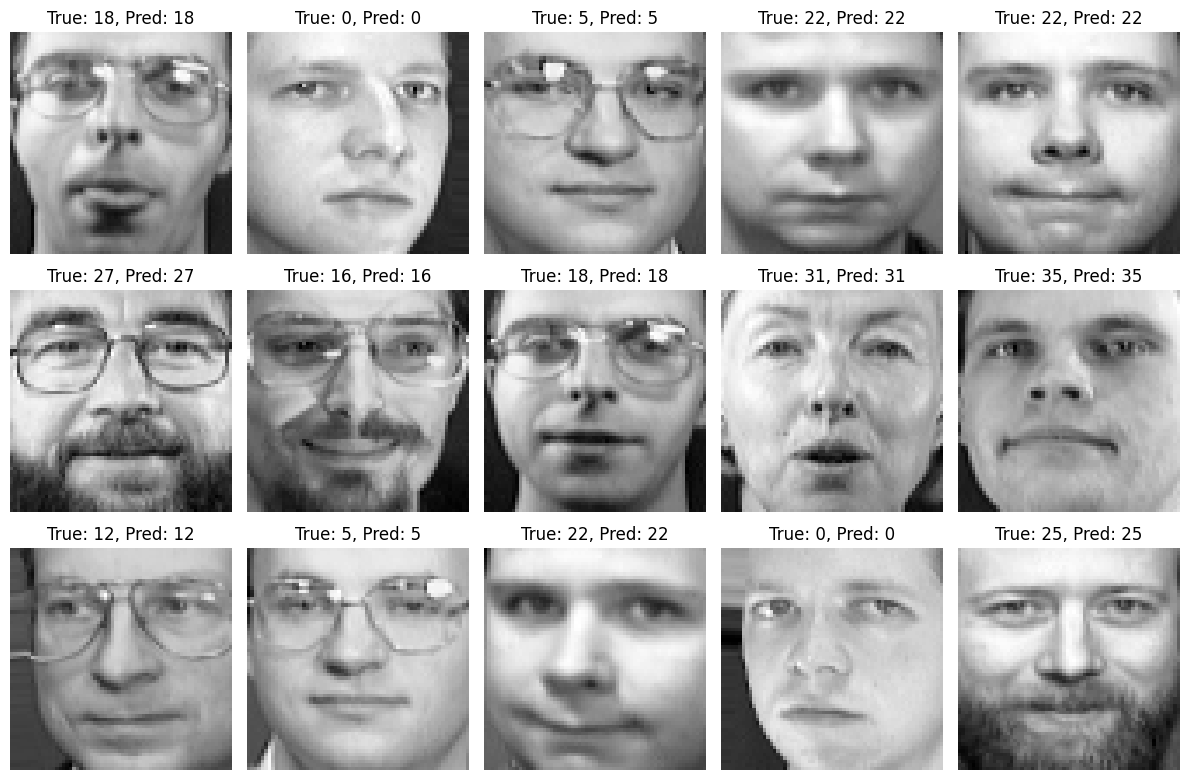

In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation
cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%')

# Display some predictions
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred):
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray)
    ax.set_title(f"True: {label}, Pred: {prediction}")
    ax.axis('off')
plt.tight_layout()
plt.show()
